In [31]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import json


In [32]:
def print_dict(d: dict) -> None:
    print(json.dumps(d, indent=2))

In [33]:
ticker_name = "CDR.WA"
yf_ticker = yf.Ticker(ticker_name)
print_dict(yf_ticker.info)

{
  "address1": "Building E",
  "address2": "ul. Jagiellonska 74",
  "city": "Warsaw",
  "zip": "03-301",
  "country": "Poland",
  "phone": "48 22 519 6900",
  "fax": "48 22 375 7710",
  "website": "https://www.cdprojekt.com",
  "industry": "Electronic Gaming & Multimedia",
  "industryKey": "electronic-gaming-multimedia",
  "industryDisp": "Electronic Gaming & Multimedia",
  "sector": "Communication Services",
  "sectorKey": "communication-services",
  "sectorDisp": "Communication Services",
  "longBusinessSummary": "CD Projekt S.A., together its subsidiaries, engages in the development, publishing, and digital distribution of video games for personal computers and video game consoles in Poland. The company operates through two segments, CD PROJEKT RED and GOG.com. Its product portfolio comprises The Witcher; The Witcher 2: Assassins of Kings; The Witcher 3: Wild Hunt; Thronebreaker: The Witcher Tales; Gwent: The Witcher Card game; and Cyberpunk 2077. The company also distributes video

In [34]:
period = "3mo"
interval = "1d"
historical_data = yf_ticker.history(
    period=period,
    interval=interval,
)
print(historical_data.info())
historical_data.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 2024-01-26 00:00:00+01:00 to 2024-04-26 00:00:00+02:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          64 non-null     float64
 1   High          64 non-null     float64
 2   Low           64 non-null     float64
 3   Close         64 non-null     float64
 4   Volume        64 non-null     int64  
 5   Dividends     64 non-null     float64
 6   Stock Splits  64 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.0 KB
None


c:\Users\bw200\AppData\Local\pypoetry\Cache\virtualenvs\py-quant-news-playground-0ZE7DJk8-py3.11\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-15 00:00:00+02:00,117.300003,119.449997,115.500000,115.500000,317370,0.0,0.0
2024-04-16 00:00:00+02:00,115.000000,115.300003,111.400002,111.550003,445099,0.0,0.0
2024-04-17 00:00:00+02:00,111.750000,113.150002,111.050003,112.449997,326580,0.0,0.0
2024-04-18 00:00:00+02:00,113.000000,113.800003,111.150002,112.699997,338970,0.0,0.0
2024-04-19 00:00:00+02:00,112.000000,113.800003,111.599998,113.199997,195122,0.0,0.0
2024-04-22 00:00:00+02:00,113.250000,116.349998,113.250000,116.250000,285597,0.0,0.0
2024-04-23 00:00:00+02:00,116.300003,117.750000,115.050003,115.750000,364389,0.0,0.0
2024-04-24 00:00:00+02:00,116.000000,118.199997,115.650002,116.150002,276867,0.0,0.0
2024-04-25 00:00:00+02:00,115.900002,116.949997,114.050003,114.599998,201047,0.0,0.0


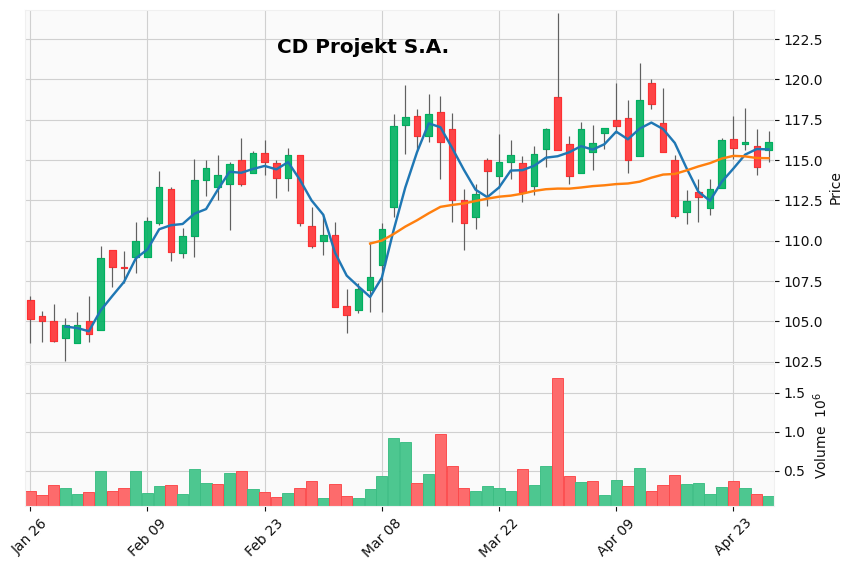

In [35]:
mpf.plot(
    historical_data,
    type="candle",
    mav=(4,30),
    volume=True,
    style="yahoo",
    figratio=(3,2),
    figscale = 1.0,
    show_nontrading=False,
    title=yf_ticker.info["longName"],
    tight_layout=True,
    warn_too_much_data=10_000,
)

In [36]:
period = "3mo"
interval = "1h"
historical_data_hourly = yf_ticker.history(
    period=period,
    interval=interval,
)
historical_data_hourly['Date'] = historical_data_hourly.index

In [37]:
# https://python.stockindicators.dev/guide/
from stock_indicators import indicators as ind
from stock_indicators import Quote
quotes = [ 
  Quote(date, open, high, low, close, volume) 
    for date, open, high, low, close, volume 
    in zip(historical_data_hourly['Date'],
           historical_data_hourly['Open'], 
           historical_data_hourly['High'], 
           historical_data_hourly['Low'],
           historical_data_hourly['Close'], 
           historical_data_hourly['Volume'], strict=True)]

sma = ind.get_sma(quotes, 20)
sma


In [38]:
from pprint import pprint
import inspect

def inspect_object(obj: object) -> None:
    pprint(type(obj))
    pprint(inspect.getmembers(obj))

inspect_object(sma[-1])

<class 'stock_indicators.indicators.sma.SMAResult'>
[('__class__', <class 'stock_indicators.indicators.sma.SMAResult'>),
 ('__delattr__',
  <method-wrapper '__delattr__' of SMAResult object at 0x000001C61AFAF410>),
 ('__dict__',
  {'_csdata': <Skender.Stock.Indicators.SmaResult object at 0x000001C61AFAF3C0>}),
 ('__dir__',
  <built-in method __dir__ of SMAResult object at 0x000001C61AFAF410>),
 ('__doc__', '\n    A wrapper class for a single unit of SMA results.\n    '),
 ('__eq__',
  <method-wrapper '__eq__' of SMAResult object at 0x000001C61AFAF410>),
 ('__format__',
  <built-in method __format__ of SMAResult object at 0x000001C61AFAF410>),
 ('__ge__',
  <method-wrapper '__ge__' of SMAResult object at 0x000001C61AFAF410>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of SMAResult object at 0x000001C61AFAF410>),
 ('__getstate__',
  <built-in method __getstate__ of SMAResult object at 0x000001C61AFAF410>),
 ('__gt__',
  <method-wrapper '__gt__' of SMAResult object at 0x00

In [39]:
[item.sma for item in sma]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 104.6025001525879,
 104.52000007629394,
 104.47249984741211,
 104.4375,
 104.43500022888183,
 104.43250007629395,
 104.4375,
 104.45,
 104.475,
 104.45250015258789,
 104.44250030517578,
 104.43250045776367,
 104.41000061035156,
 104.42000045776368,
 104.48250045776368,
 104.53000068664551,
 104.55000076293945,
 104.5575008392334,
 104.56000099182128,
 104.58750076293946,
 104.62750053405762,
 104.63500061035157,
 104.64750061035156,
 104.74750061035157,
 104.79750061035156,
 104.8325008392334,
 104.85000076293946,
 104.83500061035156,
 104.95000038146972,
 105.07250022888184,
 105.24250030517578,
 105.44000015258788,
 105.62249984741212,
 105.8224998474121,
 105.99500007629395,
 106.14249992370605,
 106.33749961853027,
 106.52999954223633,
 106.68999938964843,
 106.84249954223633,
 107.01249961853027,
 107.21999931335449,
 107.41749954223633,
 107.522499

ValueError: x and y must have same first dimension, but have shapes (569,) and (550,)

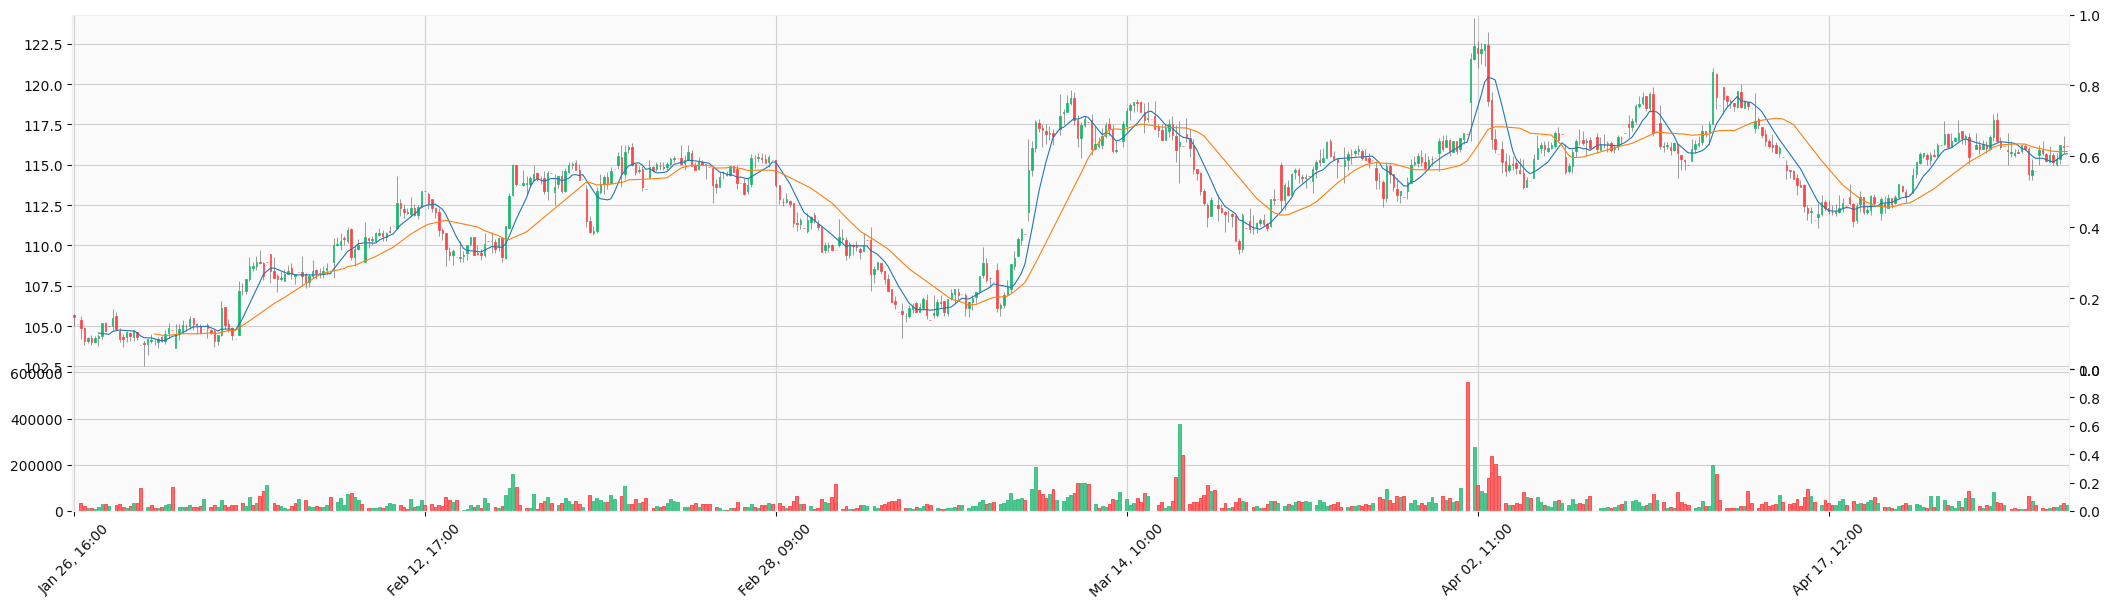

In [40]:
# https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
res = mpf.make_addplot([item.sma for item in sma if item.sma])
mpf.plot(
    historical_data_hourly,
    type="candle",
    mav=(8,24),
    volume=True,
    style="yahoo",
    figratio=(4,1),
    figscale = 1.0,
    title=yf_ticker.info["longName"],
    tight_layout=True,
    show_nontrading=False,
    warn_too_much_data=10_000,
    addplot=res,
)